In [2]:
import pandas as pd
from symbol import classdef
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

/var/folders/78/092p28v5733flr0jlqgcs3xm0000gn/T/ipykernel_50631/2711038882.py:2: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import classdef


In [3]:
credit = pd.read_csv('/Users/rick/Desktop/Python/archive/tmdb_5000_credits.csv')
movie = pd.read_csv('/Users/rick/Desktop/Python/archive/tmdb_5000_movies.csv')
movie['release_date'] = movie['release_date'].astype(str)
movie['year'] = None
for i in range(len(movie)):
    hi = movie['release_date'].iloc[i].split('-')
    movie['year'].iloc[i] = hi[0]
movie['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [4]:
gen_list = []
movie.genres

for i in range(len(movie)):
    gen = ast.literal_eval(movie['genres'].iloc[i])
    for j in range(len(gen)):
        if gen[j]['name'] not in gen_list:
            gen_list.append(gen[j]['name'])
# movie['genres'].iloc[0]
gen_list
for i in range(len(gen_list)):
    name = gen_list[i]
    movie[name] = 0
movie
for i in range(len(movie)):
    gen = ast.literal_eval(movie['genres'].iloc[i])
    for j in range(len(gen)):
        name = gen[j]['name']
        movie[name].iloc[i] = 1
gen_list

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

In [5]:
movie['genre'] = None
for i in range(len(movie)):
    gen = ast.literal_eval(movie['genres'].iloc[i])
    for j in range(len(gen)):
        movie['genre'].iloc[i] = gen[0]['name']
movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,genre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,0,Action
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,Adventure
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,0,0,0,0,Action
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,0,0,0,0,0,Action
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,0,0,0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,0,0,0,0,0,0,0,0,0,Action
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,1,0,0,0,0,0,0,0,0,Comedy
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,1,0,0,0,0,0,0,0,1,Comedy
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,0,0,0,0,0,0,0,0,0,None


<AxesSubplot:xlabel='genre', ylabel='budget'>

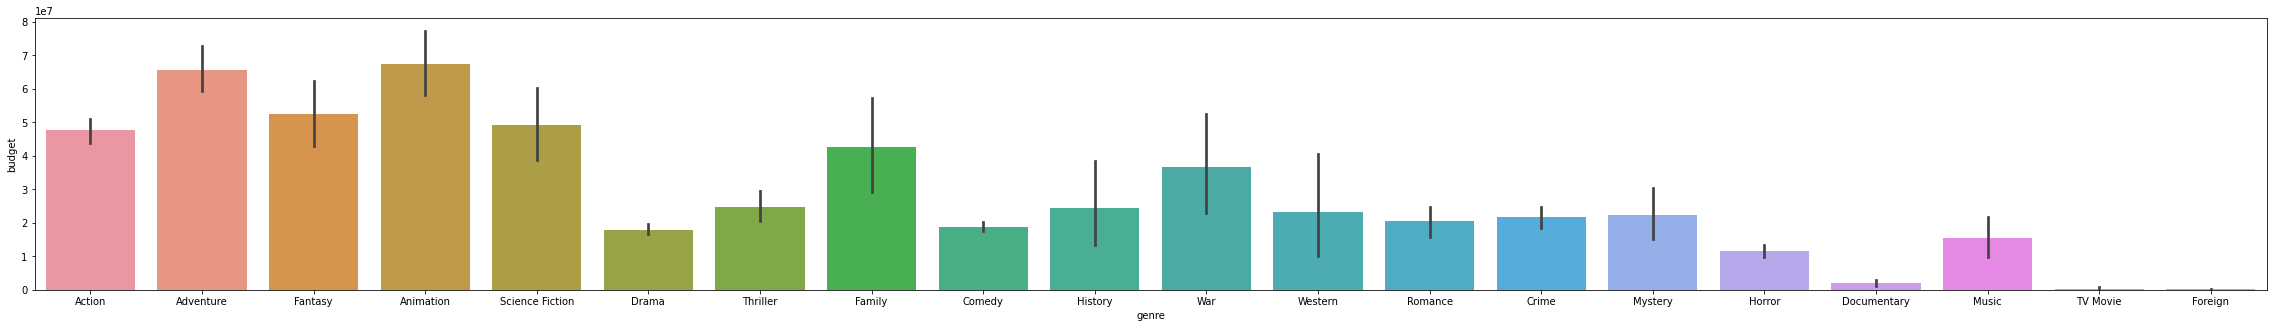

In [6]:
fig, ax = plt.subplots(figsize=(40, 5))
sns.barplot(data = movie, x = 'genre', y = 'budget' ,ax = ax)


In [7]:
credit['direct'] = None
for i in range(len(credit)):
#     credit['crew'].iloc[i]
    hi = ast.literal_eval(credit['crew'].iloc[i])
    for j in hi:
        if j['job'] == 'Director':
            credit['direct'].iloc[i] = j['name']
            break
credit

,movie_id,title,cast,crew,direct
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton
...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",Scott Smith
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",Daniel Hsia


In [8]:
credit['lead_actor'] = None
for i in range(len(credit)):
#     credit['crew'].iloc[i]
    hi = ast.literal_eval(credit['cast'].iloc[i])
    if len(hi) != 0:
        credit['lead_actor'].iloc[i] = hi[0]['name']
          
credit


,movie_id,title,cast,crew,direct,lead_actor
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch
...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez,Carlos Gallardo
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns,Edward Burns
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",Scott Smith,Eric Mabius
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",Daniel Hsia,Daniel Henney


In [9]:
credit.rename(columns={'movie_id':'id'},inplace=True)
whole = pd.merge(movie, credit, on = 'id')
whole['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [10]:
fig = px.scatter(whole, x="budget", y="revenue", color='vote_average', hover_name= 'original_title', trendline="ols")
fig.show()

In [11]:
fig = px.scatter(whole, x="budget", y="revenue", color='vote_average', hover_name= 'original_title',
                 labels={
                     "budget": "Budget",
                     "revenue": "Revenue",
                     "vote_average": "Rating"
                 },
                title="Budget and Revenue")
fig.show()

In [12]:

genre = whole.groupby(['year','genre'],as_index=False)[['revenue','budget']].agg(sum)

genre['year'] = genre['year'].astype(int)
genre = genre[genre['year']<2016]
fig = px.line(genre, x='year', y='revenue', color = 'genre')
fig.show()


In [13]:
gensum = []
for i in gen_list:
    nu = whole[i].sum()
    gensum.append(nu)

# gen_list.pop()
# gensum.pop()
fig = go.Figure(data=[go.Pie(labels=gen_list, values=gensum, hole=.3,textinfo='label+percent',title="Genre Percentage")])
fig.show()
gen_list


['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

In [14]:
new = whole
new['rating'] = None

for i in range(len(new)):
    if new['vote_average'].iloc[i] > 6:
        new['rating'].iloc[i] = 'Good'
    else:
        new['rating'].iloc[i] = 'Bad'
new


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Documentary,Foreign,TV Movie,genre,title_y,cast,crew,direct,lead_actor,rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,Action,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington,Good
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,Adventure,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp,Good
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,Action,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig,Good
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,Action,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale,Good
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,Action,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,0,0,0,Action,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez,Carlos Gallardo,Good
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,0,0,Comedy,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns,Edward Burns,Bad
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,0,1,Comedy,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019

In [15]:
new = new.dropna()
new['year'] = new['year'].astype(int)
# new = new[new['year']<2016]
fig = px.histogram(new, x="year", y="revenue",  color="rating", marginal="box",
                   labels={
                     "year": "Year",
                     "revenue": "Total Revenue",
                     "rating": "Rating"
                 },
                title="Total Revenue and Rating through the years")
fig.show()
new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Documentary,Foreign,TV Movie,genre,title_y,cast,crew,direct,lead_actor,rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,Action,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington,Good
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,Adventure,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp,Good
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,Action,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig,Good
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,Action,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale,Good
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,Action,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,31192,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://downterrace.blogspot.com/,42151,"[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,[],...,0,0,0,Drama,Down Terrace,"[{""cast_id"": 4, ""character"": ""Bill"", ""credit_i...","[{""credit_id"": ""52fe45f0c3a36847f80e3327"", ""de...",Ben Wheatley,Robert Hill,Good
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,0,0,0,Comedy,Clerks,"[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...","[{""credit_id"": ""52fe434ac3a36847f8049253"", ""de...",Kevin Smith,Brian O'Halloran,Good
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],...,0,0,0,Comedy,Dry Spell,"[{""cast_id"": 4, ""character"": ""Sasha"", ""cred

In [16]:
fig = px.scatter(new, x="budget", y="revenue", color='rating', marginal_x="histogram", hover_name= 'original_title', trendline="ols", trendline_color_override="black",
                 labels={
                     "budget": "Budget",
                     "revenue": "Revenue",
                     "rating": "Rating"
                 },
                title="Budget and Revenue")
fig.show()


In [17]:
whole['era'] = None
whole['year'] = whole['year'].astype(str)
whole['year'].iloc[0][-2]
for i in range(len(whole)):
    time = whole['year'].iloc[i]
    if time[0] == '2':
        whole['era'].iloc[i] = '20' + whole['year'].iloc[i][-2] + '0'
    elif time[0] == '1':
        whole['era'].iloc[i] = '19' + whole['year'].iloc[i][-2] + '0'

whole

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Foreign,TV Movie,genre,title_y,cast,crew,direct,lead_actor,rating,era
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,Action,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington,Good,2000
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,Adventure,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp,Good,2000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,Action,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig,Good,2010
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,Action,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale,Good,2010
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,Action,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch,Good,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,0,0,Action,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez,Carlos Gallardo,Good,1990
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,0,Comedy,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns,Edward Burns,Bad,2010
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,1,Comedy,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oli

In [29]:
new = whole.dropna()
new['era'] = new['era'].astype(int)
fig = px.violin(new, y="vote_average", x="era", color="era", box=True, points="all", hover_name='original_title',
                   labels={
                     "era": "Year",
                     "vote_average": "Rating"
                 },
                title="Rating of the age")
fig.show()
new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Foreign,TV Movie,genre,title_y,cast,crew,direct,lead_actor,rating,era
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,Action,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington,Good,2000
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,Adventure,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp,Good,2000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,Action,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig,Good,2010
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,Action,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale,Good,2010
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,Action,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch,Good,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,31192,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://downterrace.blogspot.com/,42151,"[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,[],...,0,0,Drama,Down Terrace,"[{""cast_id"": 4, ""character"": ""Bill"", ""credit_i...","[{""credit_id"": ""52fe45f0c3a36847f80e3327"", ""de...",Ben Wheatley,Robert Hill,Good,2000
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,0,0,Comedy,Clerks,"[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...","[{""credit_id"": ""52fe434ac3a36847f8049253"", ""de...",Kevin Smith,Brian O'Halloran,Good,1990
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],...,0,0,Comedy,Dry Spell,"[{""cast_id"": 4, ""character"": ""Sash

In [30]:
new['profit'] = new['revenue'] - new['budget']
new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,TV Movie,genre,title_y,cast,crew,direct,lead_actor,rating,era,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,Action,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington,Good,2000,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,Adventure,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp,Good,2000,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,Action,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,Daniel Craig,Good,2010,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,Action,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,Christian Bale,Good,2010,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,Action,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,Taylor Kitsch,Good,2010,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,31192,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://downterrace.blogspot.com/,42151,"[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,[],...,0,Drama,Down Terrace,"[{""cast_id"": 4, ""character"": ""Bill"", ""credit_i...","[{""credit_id"": ""52fe45f0c3a36847f80e3327"", ""de...",Ben Wheatley,Robert Hill,Good,2000,-21192
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,0,Comedy,Clerks,"[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...","[{""credit_id"": ""52fe434ac3a36847f8049253"", ""de...",Kevin Smith,Brian O'Halloran,Good,1990,3124130
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],...,0,Comedy,Dr

In [31]:

fig = px.scatter(new, x="budget", y="profit",
	         size="vote_average", color = 'vote_average',
                 hover_name="original_title", log_x=True, size_max=20,
                   labels={
                     "budget": "Budget",
                     "vote_average": "Rating",
                     "profit": "Profit"
                 },
                title="Total Profit and Rating through the years")
fig.show()

In [32]:
fig = px.scatter(new, x="runtime", y="profit",
	         size="vote_average", color = 'vote_average',
                 hover_name="original_title", log_x=True, size_max=20,
                   labels={
                     "runtime": "Runtime",
                     "vote_average": "Rating",
                     "profit": "Profit"
                 },
                title="Does movie runtime matter to the profit?")
fig.show()

In [33]:
new['month'] = None
for i in range(len(new)):
    mon = new['release_date'].iloc[i].split('-')
    new['month'].iloc[i] = mon[1]

In [34]:
new['month'] = new['month'].astype(int)
new['year'] = new['year'].astype(int)
new_group = new.groupby(['month'],as_index=False)[['profit']].sum()
new_group
# yuqi_group = yuqi_group[yuqi_group['year'] <= 2015]
# year_arr = yuqi_group['year'].unique()
# month = yuqi_group['month'].unique()
# pro = yuqi_group['profit'].values
# chunks = [pro[x:x+12] for x in range(0, len(pro), 12)]
# month
# fig = ff.create_annotated_heatmap(chunks, x=year_arr, y=month, colorscale='Viridis')
# fig.show()

,month,profit
0,1,3748111263
1,2,5715474843
2,3,11940176126
3,4,12458394699
4,5,21781502577
5,6,27631624689
6,7,15420287475
7,8,6631784809
8,9,8656858115
9,10,8515852698


In [35]:
new['iso'] = None
new['country'] = None
ru = ast.literal_eval(new['production_countries'].iloc[0])

ru[0]['iso_3166_1']
for i in range(len(new)):
    ru = ast.literal_eval(new['production_countries'].iloc[i])
    if len(ru)!= 0:
        new['iso'].iloc[i] = ru[0]['iso_3166_1']
        new['country'].iloc[i] = ru[0]['name']

geo = new.groupby('country',as_index=False)['profit'].sum()
fig = go.Figure(data=go.Choropleth(
    locations = geo['country'],
    z = geo['profit'],
    text = geo['country'],
    locationmode = 'country names',
    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'Profit US$',
    
    
    
))

fig.update_layout(
    title_text='Global profit',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

In [46]:
director = new.groupby('direct',as_index=False).agg({'revenue':'sum','vote_average':'mean'})
# new['director'] = None
          
reve = director.sort_values('revenue',ascending=False)
re_head = reve.head(10)
fig = px.bar(re_head, y='revenue', x='direct', text_auto='.2s', color = 'revenue',
                   labels={
                     "revenue": "Revenue",
                     "direct": "Director"
                 },
            title="Top 10 revenue director")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [48]:
rate = re_head.sort_values('vote_average',ascending=False)
rate
fig = px.bar(rate, y='vote_average', x='direct', text_auto='.2s', color = 'revenue',
                   labels={
                     "vote_average": "Rating",
                     "direct": "Director"
                 },
            title="Top 10 revenue director Movie Rating")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
# Michael Bay has close value to Christopher Nolan in terms of movie revenue
# But the rating of his movie is significantly lower than Nolan's.